In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from scipy import signal

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

import os

In [53]:
print(os.listdir("Data/genres_original"))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [54]:
#Understanding the Audio File

y, sr = librosa.load("Data/genres_original/blues/blues.00000.wav")

print("Sound Array :", y)
print("Sample Rate (KHz)", sr)

Sound Array : [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
Sample Rate (KHz) 22050


In [55]:
#Trimming the Silence sequences sandwiching the audio file

y, _ = librosa.effects.trim(y)
print(y)

#Observe no preceeding or succeding silence

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


Text(0.5, 1.0, 'Waveform in Blues 0')

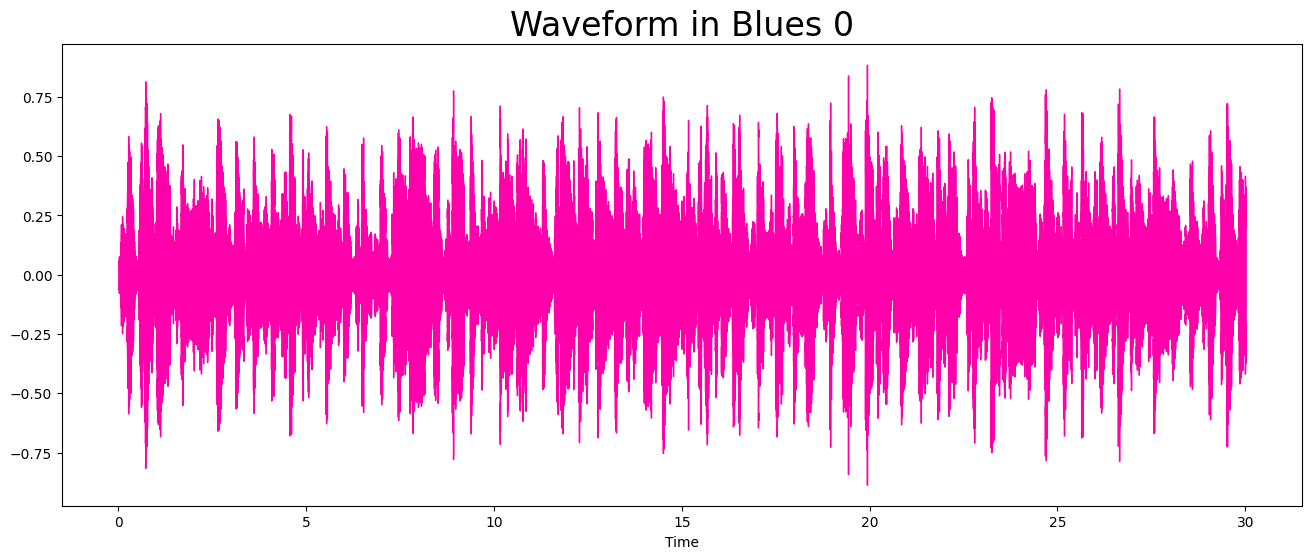

In [20]:
#2D Representation using Waveform

plt.figure(figsize = (16,6))
librosa.display.waveshow(y = y, sr = sr, color = "#FF00AB");
plt.title("Waveform in Blues 0", fontsize = 24)

In [29]:
#Decomposing the waveform based on the frequencies using FFT

n_fft = 2048
hop_length = 512

D = np.abs(librosa.stft(y, n_fft = n_fft, hop_length = hop_length))



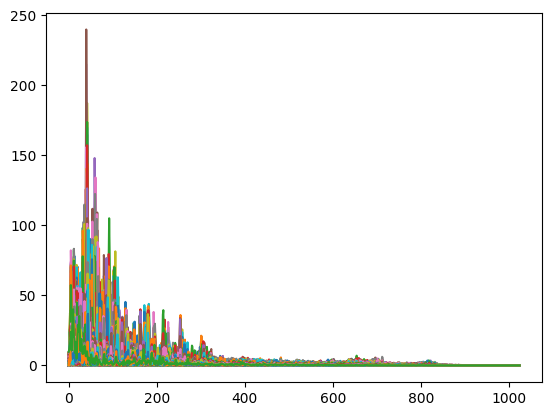

In [30]:
plt.plot(D)
plt.show()

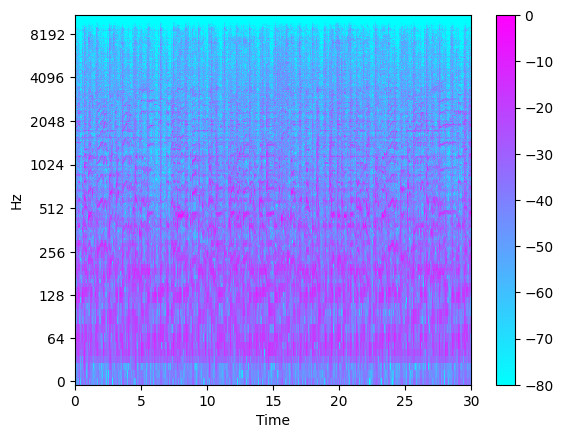

In [35]:
#Creating Log Frequency Spectogram from the FFT Signal
#This also scales to the decibel system, as that is also log based.

Deci = librosa.amplitude_to_db(D, ref = np.max)
librosa.display.specshow(Deci, sr = sr, hop_length=hop_length, x_axis='time',y_axis='log',cmap = 'cool')

plt.colorbar()

Text(0.5, 1.0, 'Mel Spectrogram')

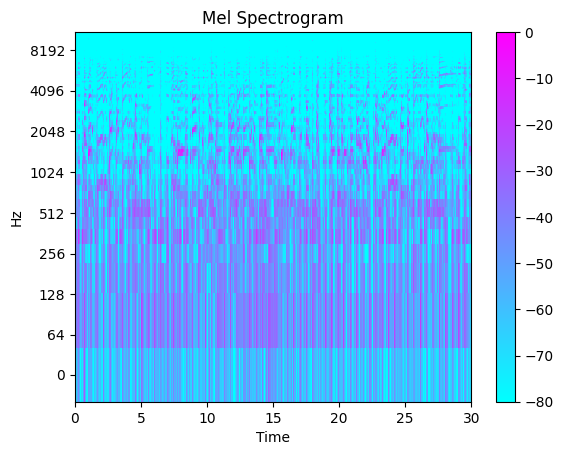

In [41]:
#Mel Spectrogram form the data

Mel_S = librosa.feature.melspectrogram(y =y, sr= sr)
Deci_S = librosa.amplitude_to_db(Mel_S, ref = np.max)
librosa.display.specshow(Deci_S, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool')
plt.colorbar()
plt.title("Mel Spectrogram", fontsize = 12)

(12, 1293)


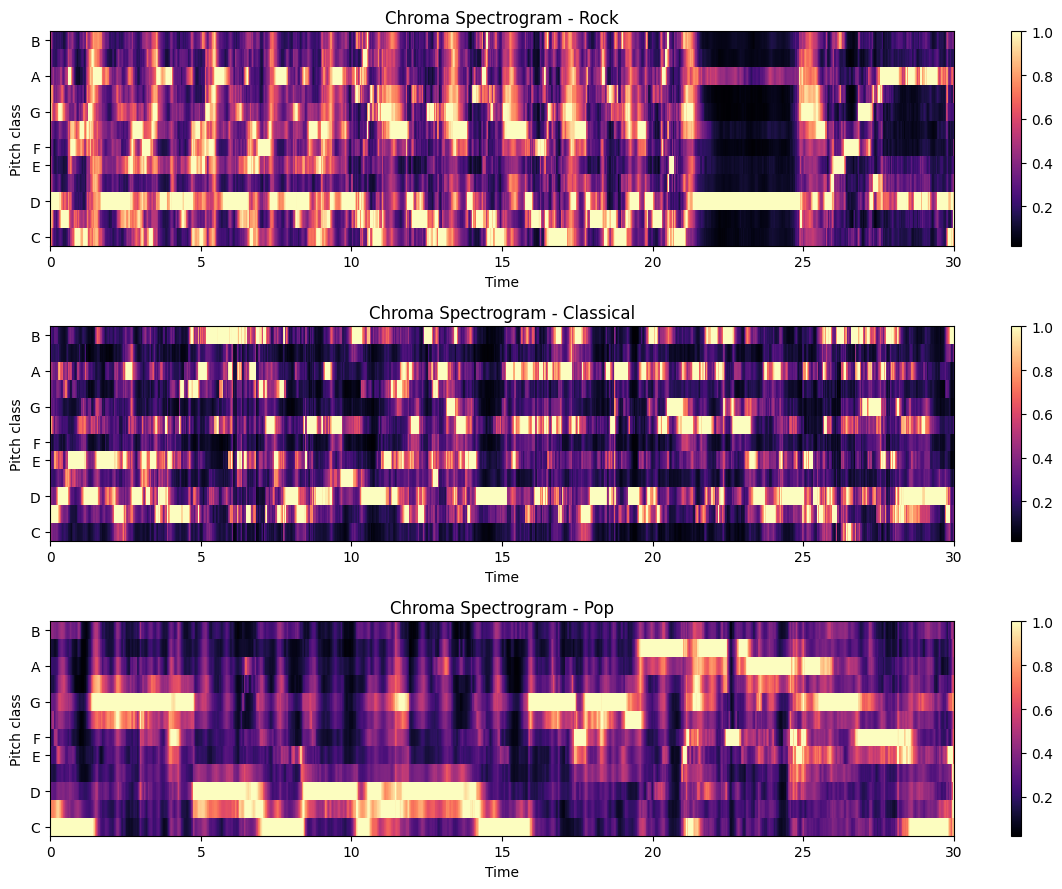

In [76]:
#Chroma Spectogram
#This represents the energy distribution across pitch classes
#Lets compare 3 genres, Rock, Pop and Classical

rock, r_sr = librosa.load("Data/genres_original/rock/rock.00000.wav")
classical, c_sr = librosa.load("Data/genres_original/classical/classical.00000.wav")
pop, p_sr = librosa.load("Data/genres_original/pop/pop.00000.wav")



# Compute chroma spectrograms for each genre
chroma_rock = librosa.feature.chroma_cqt(y=rock, sr=r_sr)
chroma_cls = librosa.feature.chroma_cqt(y=classical, sr=c_sr)
chroma_pop = librosa.feature.chroma_cqt(y=pop, sr=p_sr)


# Plot the chroma spectrograms for each genre
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
librosa.display.specshow(chroma_rock, sr=r_sr, x_axis='time', y_axis='chroma')
plt.title('Chroma Spectrogram - Rock')
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_cls, sr=c_sr, x_axis='time', y_axis='chroma')
plt.title('Chroma Spectrogram - Classical')
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_pop, sr=p_sr, x_axis='time', y_axis='chroma')
plt.title('Chroma Spectrogram - Pop')
plt.colorbar()
plt.tight_layout()

plt.show()

As can be seen through the chroma spectogram, the Rock and Classical Music seem to have the melodies consisting to a lot of notes at the same time, while the pop music(for general audience) consist very few notes at the same instant.
Even if multiple notes are present at same time in Pop, they are usually harmonies i.e. 3rd or 5th of the root note.

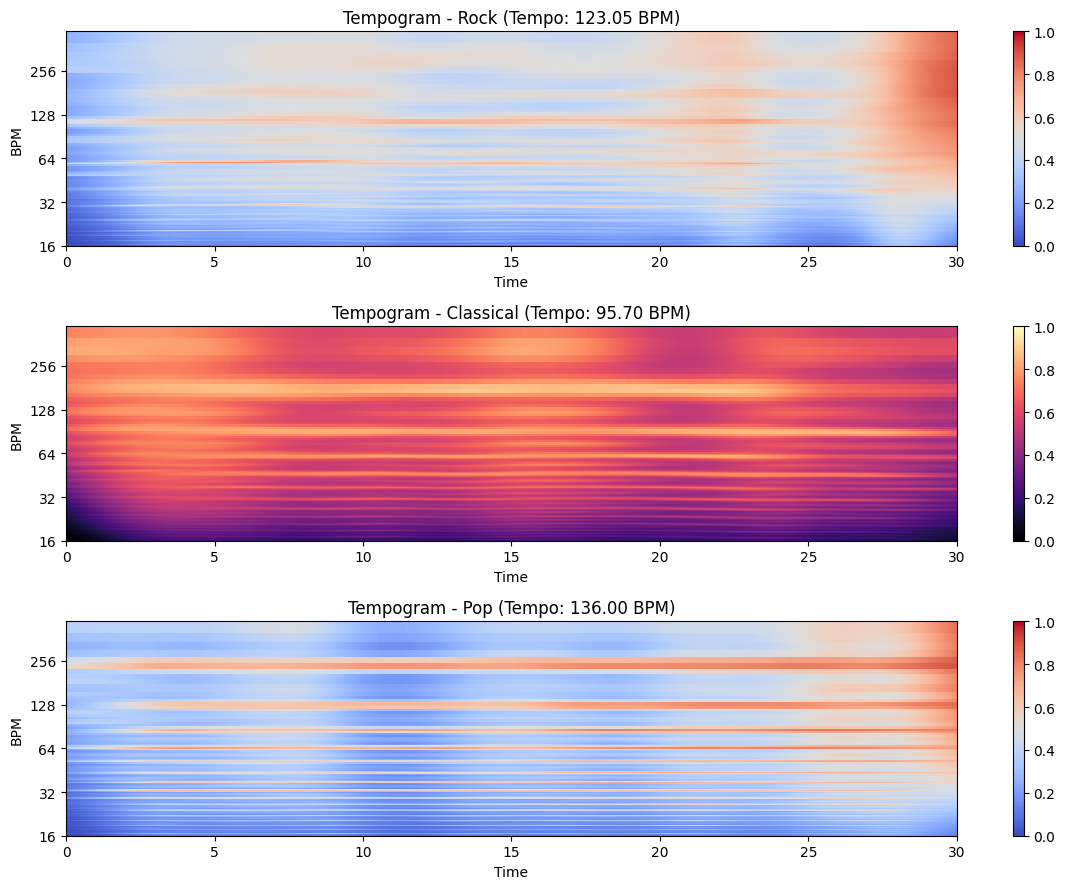

In [69]:
# Compute tempograms for each genre
tempo_rock= librosa.beat.tempo(y=rock, sr=r_sr)
tempogram_rock = librosa.feature.tempogram(y=rock, sr=r_sr, hop_length=512, win_length=384, window=np.hanning)

tempo_cls = librosa.beat.tempo(y=classical, sr=c_sr)
tempogram_cls = librosa.feature.tempogram(y=classical, sr=c_sr, hop_length=512, win_length=384, window=np.hanning)

tempo_pop = librosa.beat.tempo(y=pop, sr=p_sr)
tempogram_pop = librosa.feature.tempogram(y=pop, sr=p_sr, hop_length=512, win_length=384, window=np.hanning)

# Plot the tempograms for each genre
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
librosa.display.specshow(tempogram_rock, sr=r_sr, hop_length=512, x_axis='time', y_axis='tempo')
plt.title('Tempogram - Rock (Tempo: {:.2f} BPM)'.format(tempo_rock[0]))
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 2)
librosa.display.specshow(tempogram_cls, sr=c_sr, hop_length=512, x_axis='time', y_axis='tempo')
plt.title('Tempogram - Classical (Tempo: {:.2f} BPM)'.format(tempo_cls[0]))
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 3)
librosa.display.specshow(tempogram_pop, sr=p_sr, hop_length=512, x_axis='time', y_axis='tempo')
plt.title('Tempogram - Pop (Tempo: {:.2f} BPM)'.format(tempo_pop[0]))
plt.colorbar()
plt.tight_layout()

plt.show()

Not much can be said able the genres with just looking at the tempograms, 
so let's overlay the tempogram with the CQT spectogram, which provides the pitch over time for the audio file.

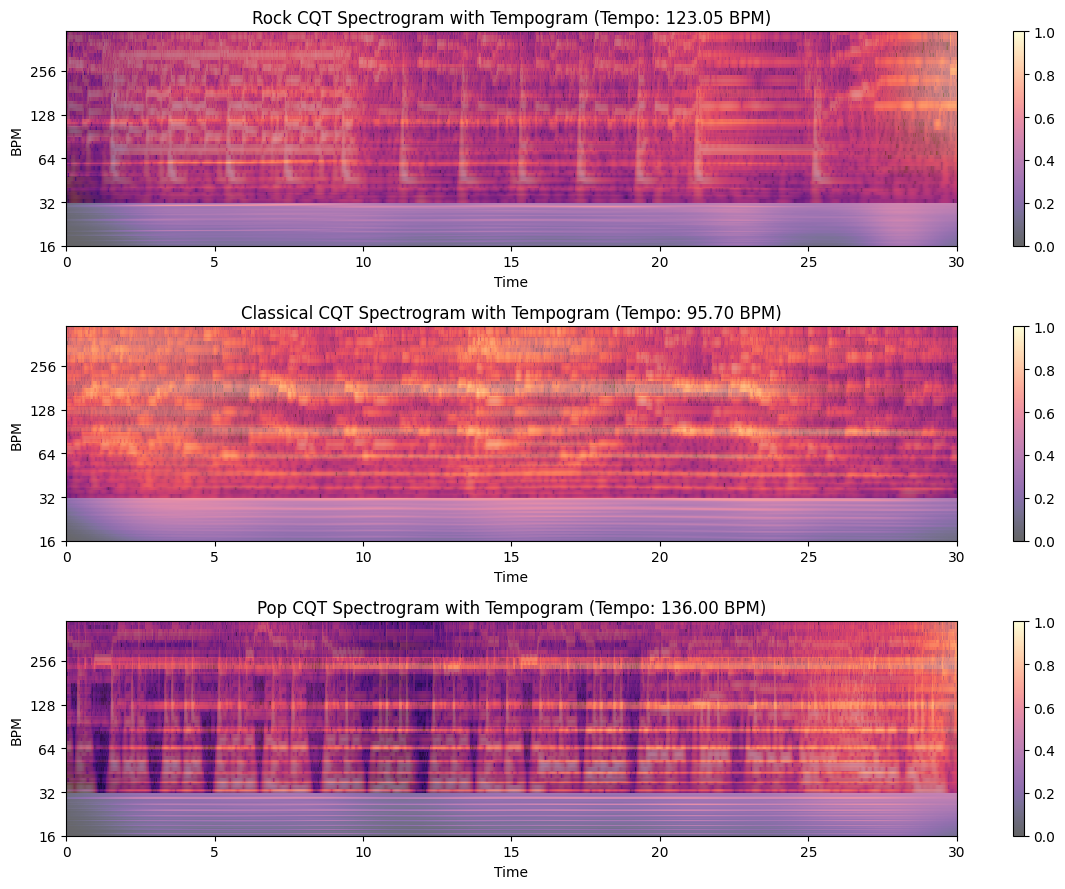

In [75]:
# Compute CQT spectrograms for each genre
cqt_rock = np.abs(librosa.cqt(rock, sr=r_sr, hop_length=512))
cqt_cls = np.abs(librosa.cqt(classical, sr=c_sr, hop_length=512))
cqt_pop = np.abs(librosa.cqt(pop, sr=p_sr, hop_length=512))

# cqt_rock = sklearn.preprocessing.scale(cqt_rock, axis=1)
# cqt_cls = sklearn.preprocessing.scale(cqt_cls, axis=1)
# cqt_pop = sklearn.preprocessing.scale(cqt_pop, axis=1)
# Plot the CQT spectrograms with tempograms overlaid for each genre
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(cqt_rock, ref=np.max), sr=r_sr, hop_length=512, x_axis='time', y_axis='cqt_note')
librosa.display.specshow(tempogram_rock, sr=r_sr, hop_length=512, x_axis='time', y_axis='tempo', cmap='magma', alpha=0.6)
plt.title('Rock CQT Spectrogram with Tempogram (Tempo: {:.2f} BPM)'.format(tempo_rock[0]))
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(cqt_cls, ref=np.max), sr=c_sr, hop_length=512, x_axis='time', y_axis='cqt_note')
librosa.display.specshow(tempogram_cls, sr=c_sr, hop_length=512, x_axis='time', y_axis='tempo', cmap='magma', alpha=0.6)
plt.title('Classical CQT Spectrogram with Tempogram (Tempo: {:.2f} BPM)'.format(tempo_cls[0]))
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(cqt_pop, ref=np.max), sr=p_sr, hop_length=512, x_axis='time', y_axis='cqt_note')
librosa.display.specshow(tempogram_pop, sr=p_sr, hop_length=512, x_axis='time', y_axis='tempo', cmap='magma', alpha=0.6)
plt.title('Pop CQT Spectrogram with Tempogram (Tempo: {:.2f} BPM)'.format(tempo_pop[0]))
plt.colorbar()
plt.tight_layout()

plt.show()


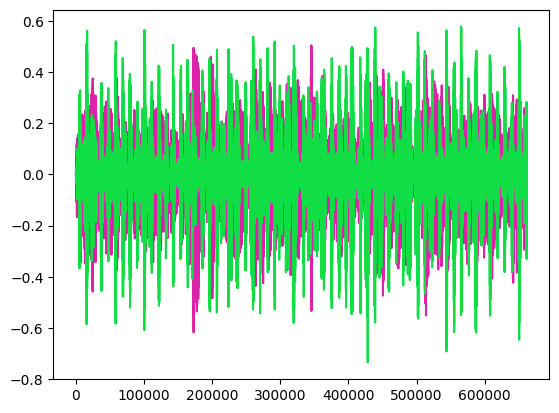

In [61]:
#Harmonics and Percussive for the Audio file

y_harm, y_perc = librosa.effects.hpss(y)
plt.plot(y_harm, color = '#DD22AA')
plt.plot(y_perc, color = '#11DD44')
plt.show()